# Import Libaries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from pandasql import sqldf

sns.set_context("talk")
sns.set_style("whitegrid")
%matplotlib inline

# Loading the Data

In [2]:
socialbuzz_df = pd.read_csv('socialbuzz_data.csv', usecols = ['content_id', 'type','datetime','score','content_type', 'category', 'sentiment'])
socialbuzz_df.head()

,content_id,type,datetime,sentiment,score,content_type,category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,negative,0,photo,studying
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,negative,0,photo,studying
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-04-09 02:46:20,negative,0,photo,studying
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,negative,10,photo,studying
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2020-11-09 02:49:59,negative,10,photo,studying


In [3]:
socialbuzz_df.tail()

,content_id,type,datetime,sentiment,score,content_type,category
24568,99fcc8a6-550f-47a1-b312-aba8a031f6c7,heart,2021-02-26 15:33:26,positive,60,video,travel
24569,004e820e-49c3-4ba2-9d02-62db0065410c,heart,2021-03-09 08:50:44,positive,60,audio,tennis
24570,a7849ef3-5930-4ba9-9cbe-e215811e713e,heart,2020-09-26 22:01:17,positive,60,photo,studying
24571,e5f1a4c6-2b27-4c8b-ac9a-21bb6ef7c946,want,2021-02-12 11:54:33,positive,70,audio,soccer
24572,c59e27e9-0439-4699-8ea0-5e93f662a05d,adore,2021-02-02 15:29:19,positive,72,GIF,fitness


In [4]:
def dict_from_tup(dict):
    tup = []
    for k , v in dict.items():
        tup.append((k, v))
    return tup

In [5]:
socialbuzz_df['datetime'] = pd.to_datetime(socialbuzz_df['datetime'])
socialbuzz_df['month'] = socialbuzz_df['datetime'].dt.month
socialbuzz_df['monthname'] = socialbuzz_df['datetime'].dt.strftime('%B')
socialbuzz_df['monthname'] .unique()

array(['November', 'January', 'April', 'June', 'September', 'August',
       'May', 'March', 'February', 'July', 'December', 'October'],
      dtype=object)

# Data Insights

In [6]:
category_score = pd.DataFrame(socialbuzz_df.groupby('category')['score'].agg('sum'))
category_score.reset_index('category', inplace= True)
category_score.sort_values('score', ascending = False, inplace  = True)
top_5_category = category_score.iloc[:5]
top_5_score = socialbuzz_df[socialbuzz_df['category'].isin(list(top_5_category['category']))]
top_5_score['category'].unique()

array(['healthy eating', 'science', 'food', 'technology', 'animals'],
      dtype=object)

In [7]:

monthly_post = pd.DataFrame(top_5_score.groupby('datetime')['content_id'].value_counts())
monthly_post.reset_index(['datetime', 'content_id'], inplace = True)
monthly_post['month_no'] = monthly_post['datetime'].dt.month
monthly_post['month'] = monthly_post['datetime'].dt.strftime('%B')
monthly_post_count = pd.DataFrame(monthly_post.groupby(['month_no', 'month'])['month'].value_counts())
monthly_post_count.reset_index(['month_no', 'month'], inplace = True)
monthly_post_count[monthly_post_count['count'] == max(list(monthly_post_count['count']))]['month']

4    May
Name: month, dtype: object

In [8]:
socialbuzz_df['category'].value_counts()[:1]

category
animals    1897
Name: count, dtype: int64

In [9]:
len(list(socialbuzz_df['category'].unique()))

16

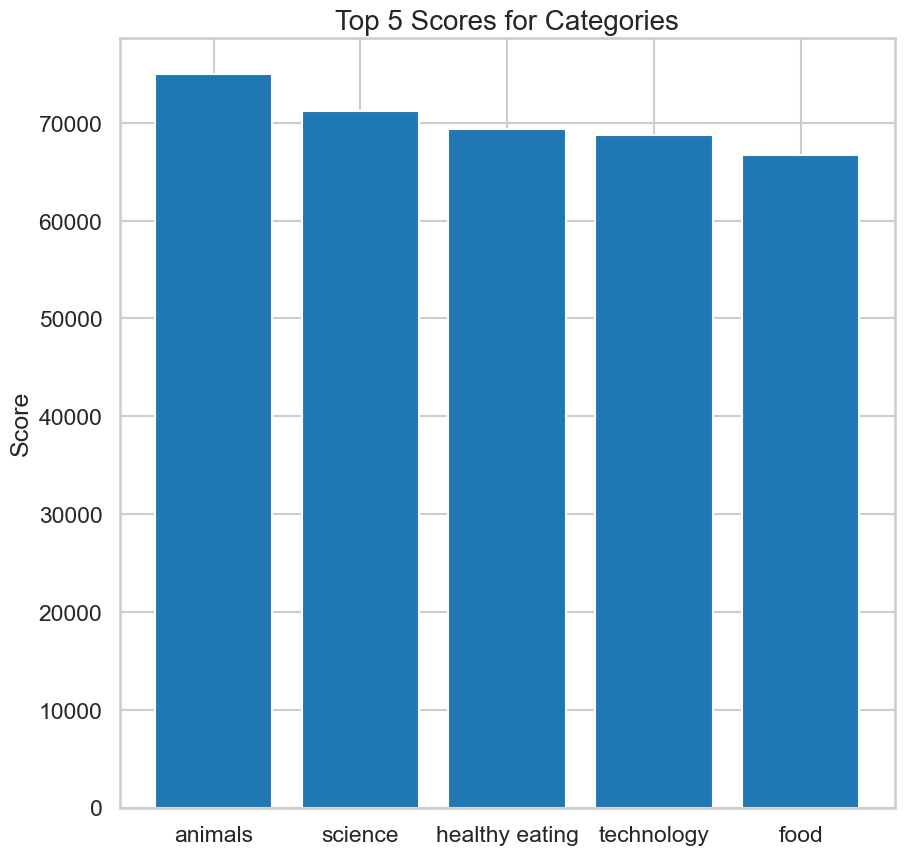

In [10]:
score_category = socialbuzz_df.groupby('category')['score'].sum()
score_category_dict = dict(score_category)
score_cat_tup = [(k,v) for k,v in score_category_dict.items()]
label =[ i[0] for i in sorted(score_cat_tup, key = lambda tup:tup[1], reverse = True)[:5]]
val = [i[1] for i in sorted(score_cat_tup, key = lambda tup:tup[1], reverse = True)[:5]]
ticks = list(range(0,len(label)))
fig, ax = plt.subplots(figsize=(10,10))
ax.bar(x = ticks, height = val)
ax.set_xticks(ticks)
ax.set_xticklabels(label)
ax.set_xlabel('')
ax.set_ylabel('Score')
ax.set_title('Top 5 Scores for Categories', fontdict= {'fontsize' : 20})
plt.show();

#### Insights: 

Based on the insights, the top 5 categories are animals, science, healthy eating, technology, and food.

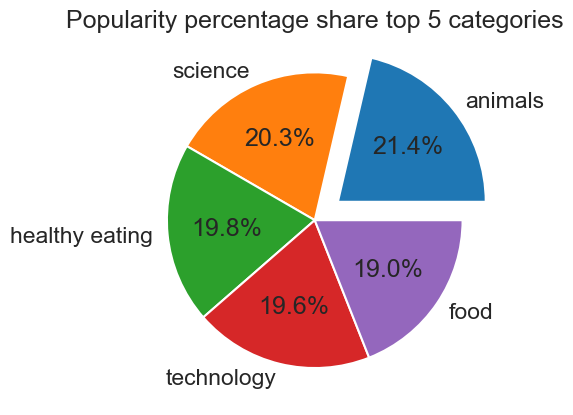

In [11]:
category = list(top_5_category['category'])
score = list(top_5_category['score'])
explode = []
for x  in list(top_5_category['score']):
    if x == max(list(top_5_category['score'])):
        explode.append(0.2)
    else:
        explode.append(0)
explode = tuple(explode)

plt.pie(x = score, explode = explode, labels = category, autopct = '%1.1f%%')
plt.title('Popularity percentage share top 5 categories')
plt.show();

#### Insights

Among the popularity share of top 5 categories, animals rank the first place for receiving high popularity score


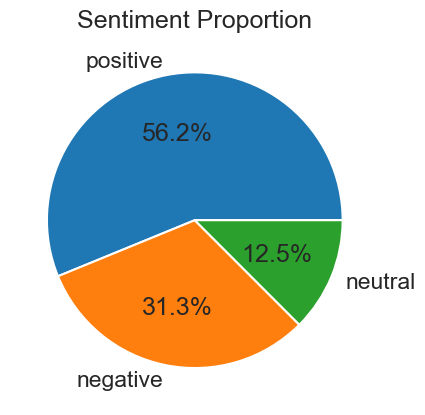

In [12]:
# https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py
# autopct:  used to label the wedges with their numeric value

sentiment_proportion = pd.DataFrame(socialbuzz_df['sentiment'].value_counts(normalize = True)).reset_index('sentiment')
labels = list(sentiment_proportion['sentiment'])
sizes = list(sentiment_proportion['proportion'])
plt.pie(x = sizes, labels = labels, autopct='%1.1f%%')
plt.title('Sentiment Proportion')
plt.show();

### Insights:
Looking from the pie chart that indicated sentiment proportion, positive reaction played the majority of the sentiment's population which beat negative and neutral sentiments.

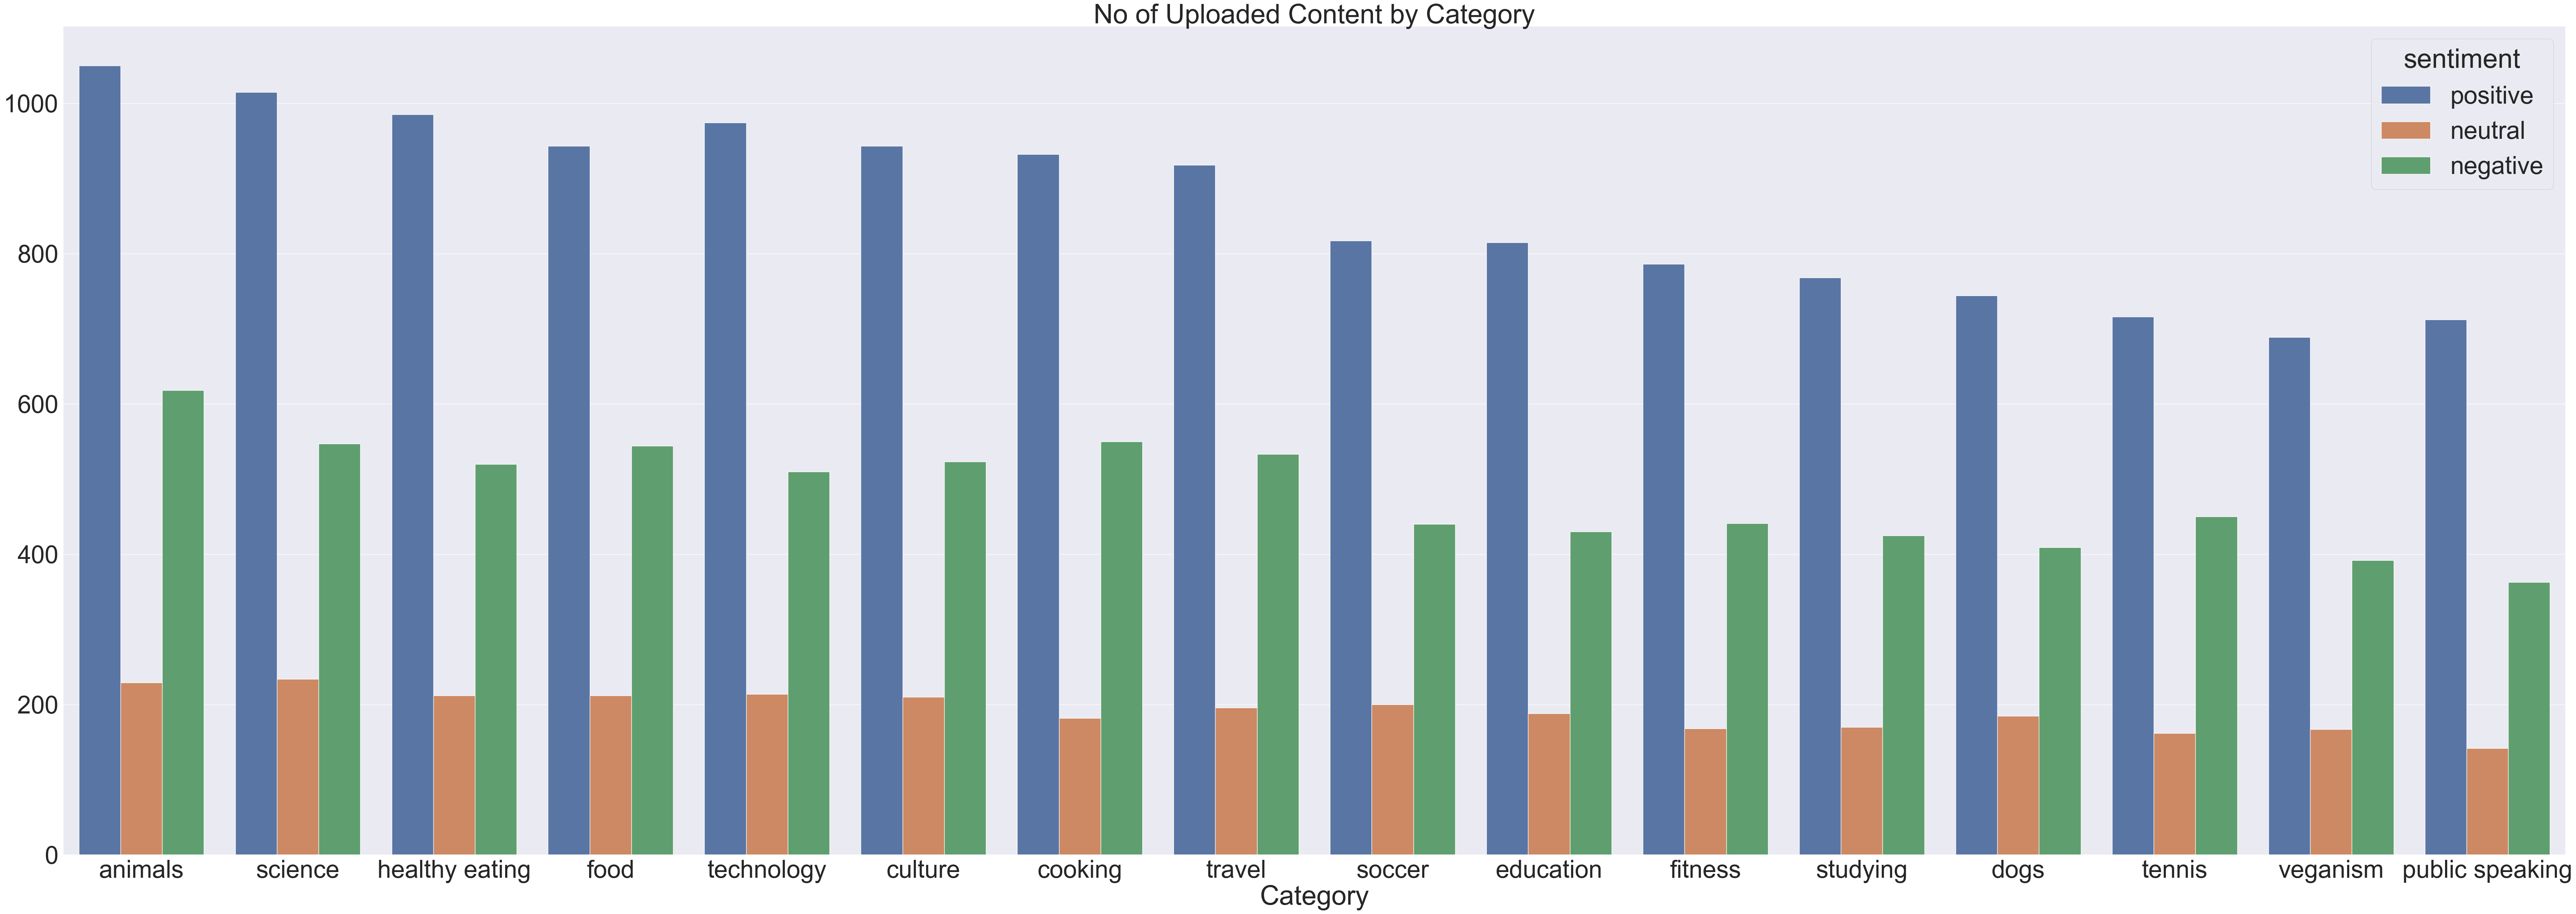

In [13]:
category_counts = pd.DataFrame(socialbuzz_df['category'].value_counts())
category_counts.rename(columns = {
    'count': 'total_count'
},inplace = True)
category_sentiment_count = pd.DataFrame(socialbuzz_df.groupby(['category', 'sentiment'])['sentiment'].value_counts())
category_sentiment_count.reset_index(['category','sentiment'], inplace = True)
category_sentiment_count.set_index('category', inplace = True)
category_sentiment_count= category_sentiment_count.join(other = category_counts, on = 'category')
category_sentiment_count= category_sentiment_count.sort_values(by = ['total_count', 'sentiment'], ascending = False)
sns.set(font_scale=4.5)
plt.figure(figsize = (90,30))
category_sentiment_bar = sns.barplot(data = category_sentiment_count, x = 'category', y = 'count', hue ='sentiment')
category_sentiment_bar.set(title = 'No of Uploaded Content by Category', xlabel = 'Category', ylabel = '')
plt.show();

### Insights:

Based on the above bar chart, all of the content categories have the positive sentiment predominates over negative and neutral sentiments.

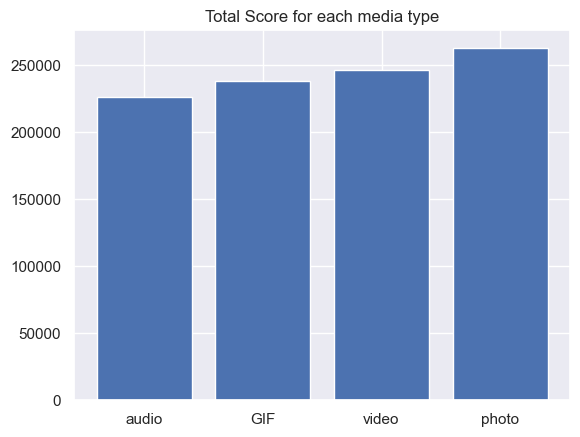

In [14]:
media_type_score = pd.DataFrame(socialbuzz_df.groupby('content_type')['score'].agg('sum')).reset_index('content_type').sort_values(by = 'score')
label = list(media_type_score['content_type'])
size = list(media_type_score['score'])
sns.set(font_scale = 1)
plt.bar(x = label, height = size)
plt.title('Total Score for each media type')
plt.show();


### Insights

Based on the insights, photos and videos are placed in the top 2 for receiving highest engagement score

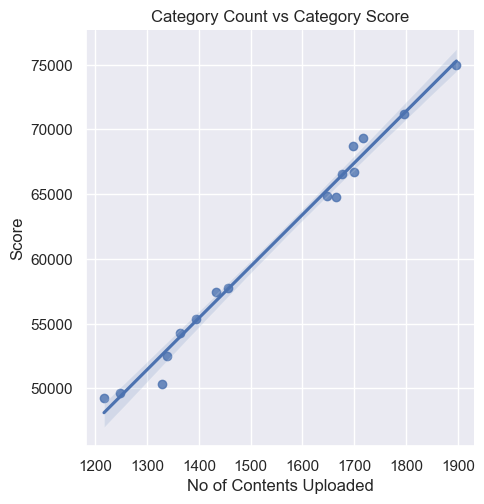

In [15]:

category_count = pd.DataFrame(socialbuzz_df['category'].value_counts())
category_score = pd.DataFrame(socialbuzz_df.groupby('category')['score'].agg('sum'))

category = category_count.reset_index('category').join(other = category_score, on = 'category')
count =list( category['count'])
score = list(category['score'])
sns.set(font_scale = 1)
category_lmplot = sns.lmplot(x = 'count', y = 'score', data = category)
category_lmplot.set(title = 'Category Count vs Category Score')
category_lmplot.set_xlabels('No of Contents Uploaded')
category_lmplot.set_ylabels('Score')
plt.show();

### Insights
Based on the line plots for the no of contents uploaded for each category vs score, category with higher number of posted content would receive higher engagement score.

# Conclusion

### Summary:

Overall, animal, science, healthy eating, food, and technology have received the highest score which made on the top 5 category.

Category with higher number of content uploaded will increase the engagement score.

Speaking of media types, photos and videos  are the top 2 for receving highest scores.

I strongly believe that these insights will lead to higher user interaction which and improved user algorithms by making more relevant according to user preferences.

##### Limitation:

Social Buzz was established 10 years ago, we were provided with the data that were recorded in the last 2 years. In other words, we don't have enough data.

##### Next steps

We are hoping to obtain enough informations i.e. that social media posts/content were posted on social media from the time when the Social Buzz were established to make the insights reliable to help the business in decision making.